# Spam email

In [10]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
#WARNING LIBRARYS
import warnings
warnings.filterwarnings("ignore")
#SKLEARN LIBRARYS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [51]:
df = pd.read_excel("C:\\files\\Fileee\\Spam Emails Classification\\spam_ham_dataset.xls")

In [52]:
df.head()

,Sr No,text,label
0,1,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,2,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,3,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,4,"Subject: photoshop , windows , office . cheap ...",spam
4,5,Subject: re : indian springs\r\nthis deal is t...,ham


In [53]:
ham = df[df["label"]=="ham"]
spam = df[df["label"]=="spam"]

In [55]:
g = df.groupby('label')
df1 = g.apply(lambda x: x.sample(g.size().min()))

<AxesSubplot:xlabel='label', ylabel='count'>

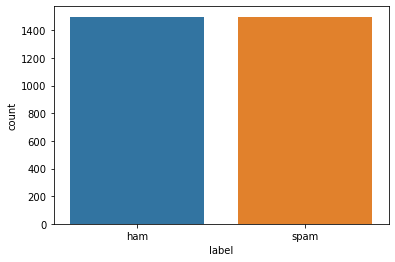

In [61]:
sns.countplot(df1["label"])

In [62]:
df1["label"].value_counts()

ham     1499
spam    1499
Name: label, dtype: int64

In [63]:
df1.columns

Index(['Sr No', 'text', 'label'], dtype='object')

In [64]:
df1.head()

Sr No                                               text label
label                                                                     
ham   3222   3223  Subject: hpl nom for april 7 , 2001\r\n( see a...   ham
      2604   2605  Subject: volume changes - december , 2000\r\np...   ham
      4050   4051  Subject: real time deal updates to path manage...   ham
      3884   3885  Subject: this week ' s neon sheet\r\n- awesome...   ham
      2932   2933  Subject: revision - enron / hpl actuals for ju...   ham

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2998 entries, ('ham', 3222) to ('spam', 3276)
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sr No   2998 non-null   int64 
 1   text    2998 non-null   object
 2   label   2998 non-null   object
dtypes: int64(1), object(2)
memory usage: 167.2+ KB


In [66]:
stemmer = PorterStemmer()
lemmitizer = WordNetLemmatizer()
stop_word = set(stopwords.words('english'))
df.reset_index(inplace = True)

In [67]:
corpus = []
for i in range(len(df1)):
    #Remove regex
    sent = re.sub('[^a-zA-Z]',' ',df['text'][i])
    
    #Convert into lower case
    sent = sent.lower()
    
    #Steamming
    sent = " ".join([stemmer.stem(word) for word in str(sent).split()])
    
    #Remove Stopwords
    sent = " ".join([stemmer.stem(word) for word in str(sent).split()
                    if(word) not in stop_word])
    corpus.append(sent)
#corpus

In [78]:
# Stem + BOW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(corpus).toarray()

#Output
y = df1['label']

In [79]:
temp_df = pd.DataFrame(X,columns = cv.get_feature_names())
temp_df

,abdv,abil,abl,abov,ac,accept,access,accomplish,accord,account,...,ye,year,yesterday,yet,young,yvett,zajac,zero,zivley,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Create ML Model

In [80]:
#Split data into training and testing from
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

In [81]:
print("X_train:- ",X_train.shape)
print("X_test:- ",X_test.shape)
print("y_train:- ",y_train.shape)
print("y_test:- ",X_test.shape)

X_train:-  (2398, 2000)
X_test:-  (600, 2000)
y_train:-  (2398,)
y_test:-  (600, 2000)


# KNN

In [72]:
# Model_Eval func
from sklearn.metrics import precision_score,recall_score,f1_score

def model_eval(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy is:- ", acc)
    print("Error is:- ", 1-acc)
    print("precision:- ",precision_score(y_test,y_pred,average="weighted"))
    print("Recall:- ",recall_score(y_test,y_pred,average="weighted"))
    print("F1 score:- ",f1_score(y_test,y_pred,average="weighted"))
    
    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    
    sns.heatmap(cm,annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")

In [92]:
#KNN
ML_Model_1 = KNeighborsClassifier(n_neighbors=2)
print("Model created")

# Model training
ML_Model_1.fit(X_train,y_train)
print("Model trained completed")

# find the y pred
y_pred = ML_Model_1.predict(X_test)
print("Y predict completed")

#find acc
acc = accuracy_score(y_test,y_pred)
print("Acc for k = 2: -", acc*100)
#model_eval(y_test,y_pred)

Model created
Model trained completed
Y predict completed
Acc for k = 2: - 49.166666666666664


# NB Model

Model train
Model prepare
accuracy for GNB is:-  51.5
Accuracy is:-  0.515
Error is:-  0.485
precision:-  0.5134418527197249
Recall:-  0.515
F1 score:-  0.5069059304298081


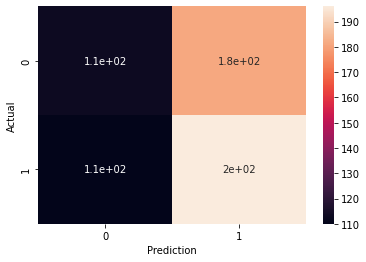

In [93]:
#Create a model for NB
from sklearn.naive_bayes import GaussianNB

#Create model
ML_Model = GaussianNB()

#Train model
ML_Model.fit(X_train,y_train)
print("Model train")

#Prepare model
y_pred = ML_Model.predict(X_test)
print("Model prepare")

#Find accuracy
acc = accuracy_score(y_test,y_pred)
print("accuracy for GNB is:- ",acc*100)
model_eval(y_test,y_pred)

# Logistic Model

Model train
Model prepare
accuracy is:-  53.333333333333336
Accuracy is:-  0.5333333333333333
Error is:-  0.4666666666666667
precision:-  0.534014423076923
Recall:-  0.5333333333333333
F1 score:-  0.533193319331933


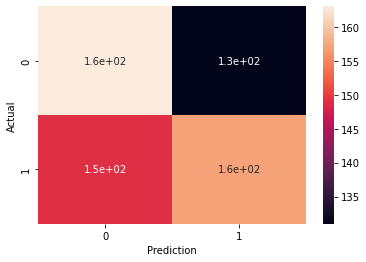

In [94]:
#Import KNN and accuracy_score from sklearn.
from sklearn.linear_model import LogisticRegression

#Create model
ML_Model_3 = LogisticRegression()

#Train model
ML_Model_3.fit(X_train,y_train)
print("Model train")

#Prepare model
y_pred = ML_Model_3.predict(X_test)
print("Model prepare")

#Find accuracy
acc = accuracy_score(y_test,y_pred)
print("accuracy is:- ",acc*100)
model_eval(y_test,y_pred)

# SVM Model

Model train
Model prepare
accuracy is:-  51.66666666666667
Accuracy is:-  0.5166666666666667
Error is:-  0.4833333333333333
precision:-  0.5165406006674083
Recall:-  0.5166666666666667
F1 score:-  0.5165806795943783


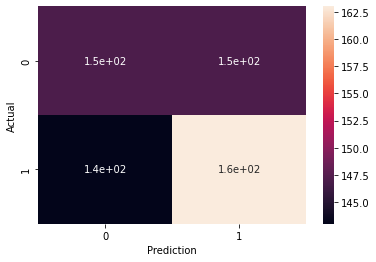

In [76]:
#Create SVM model......
from sklearn.svm import SVC
#Create model
ML_Model = SVC(kernel='linear')

#Train model
ML_Model.fit(X_train,y_train)
print("Model train")

#Prepare model
y_pred = ML_Model.predict(X_test)
print("Model prepare")

#Find accuracy
acc = ML_Model.score(X_test,y_test)
print("accuracy is:- ",acc*100)
model_eval(y_test,y_pred)

In [95]:
import joblib
joblib.dump(ML_Model_3,"Spam_mail_model.pkl")
joblib.dump(cv,"cv_model.pkl")
print("Model Saved")

Model Saved
